<a href="https://colab.research.google.com/github/laraybasrar/Credit-card-fraud/blob/master/PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import pandas as pd


In [12]:
from google.colab import drive

In [13]:
drive.mount('/content/Drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/Drive


In [14]:
credit = pd.read_csv('/content/Drive/My Drive/creditcard.csv')

In [26]:
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [22]:
(credit['Class'] == 1).sum() #no of frauds transactions

492

In [23]:
(credit['Class'] == 0).sum() #no of normal transactions

284315

In [24]:
#features
X = credit.drop('Class',axis = 1) 

In [16]:
#labels
Y = credit['Class'] 

In [25]:
import matplotlib.pyplot as plt


In [19]:
count = pd.value_counts(credit['Class'])

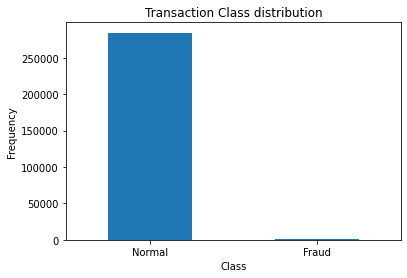

In [28]:
# distribution of normal and fraud transactions
count.plot(kind = 'bar', rot = 0)
plt.title('Transaction Class distribution')
plt.xticks(range(2), ['Normal' , 'Fraud'])
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


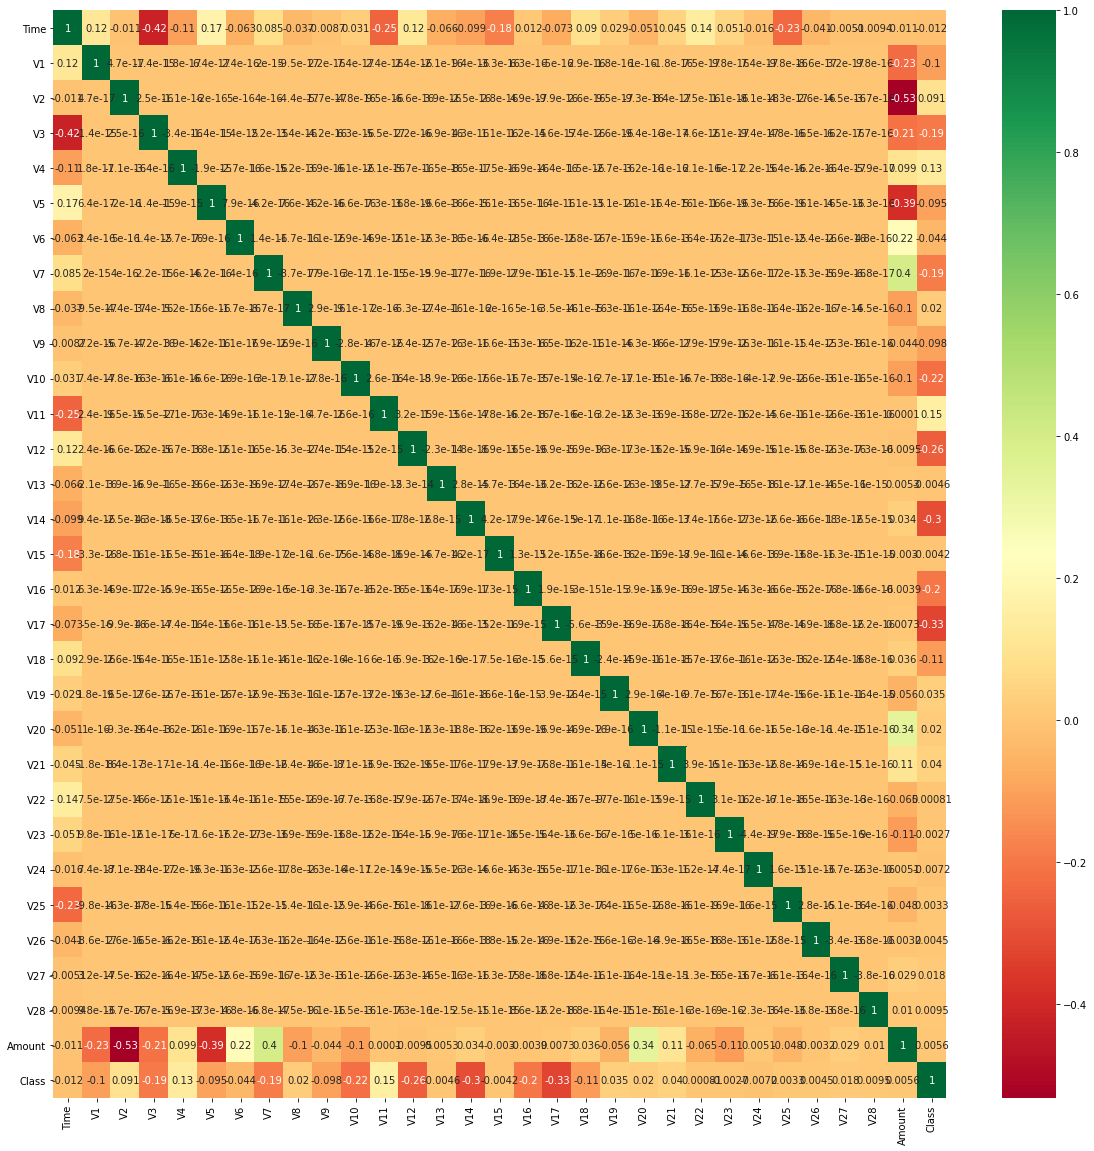

In [31]:
# Correlation
import seaborn as sns
#get correlations of each features in dataset
corrmat = credit.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(credit[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [32]:
fraud  = credit[credit['Class'] == 1]
normal = credit[credit['Class'] == 0]
print(fraud.shape)
print(normal.shape)

(492, 31)
(284315, 31)


In [33]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size = 0.3)

In [34]:
xtrain.shape


(199364, 30)

In [35]:
xtest.shape

(85443, 30)

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
dclass = DecisionTreeClassifier(min_samples_leaf=5,min_samples_split = 4)

In [40]:
dclass.fit(xtrain, ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [41]:
dclass.score(xtest, ytest)

0.9992977774656788

In [42]:
dc = DecisionTreeClassifier(min_samples_leaf=5,min_samples_split = 4)

In [64]:
credit1= credit.sample(frac = 0.4,random_state=1)

In [65]:
x = credit1.drop('Class',axis = 1)

In [66]:
y = credit1['Class']

In [67]:
from sklearn.model_selection import train_test_split
x1train, x1test, y1train, y1test = train_test_split(x,y, test_size = 0.3)

In [68]:
#training subset shape
x1train.shape

(79746, 30)

In [69]:
#whole dataset shape
X.shape

(284807, 30)

In [70]:
#percentage of data taken for training
(x1train.shape[0]/X.shape[0])*100

28.000014044598625

In [71]:
dc.fit(x1train, y1train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [72]:
#score of reduced fractioned test set
dc.score(x1test, y1test)

0.9993855516868069

In [73]:
#score of reduced train set
dc.score(x1train, y1train)

0.9995736463270886

In [74]:
#score of previous test set
dc.score(xtest, ytest)

0.9993094811745842

In [75]:
#score of previous train set
dc.score(xtrain, ytrain)

0.9994582773218836

**FINAL ACCURACY:**

In [76]:
#score of whole set
dc.score(X, Y)

0.9994136380074928

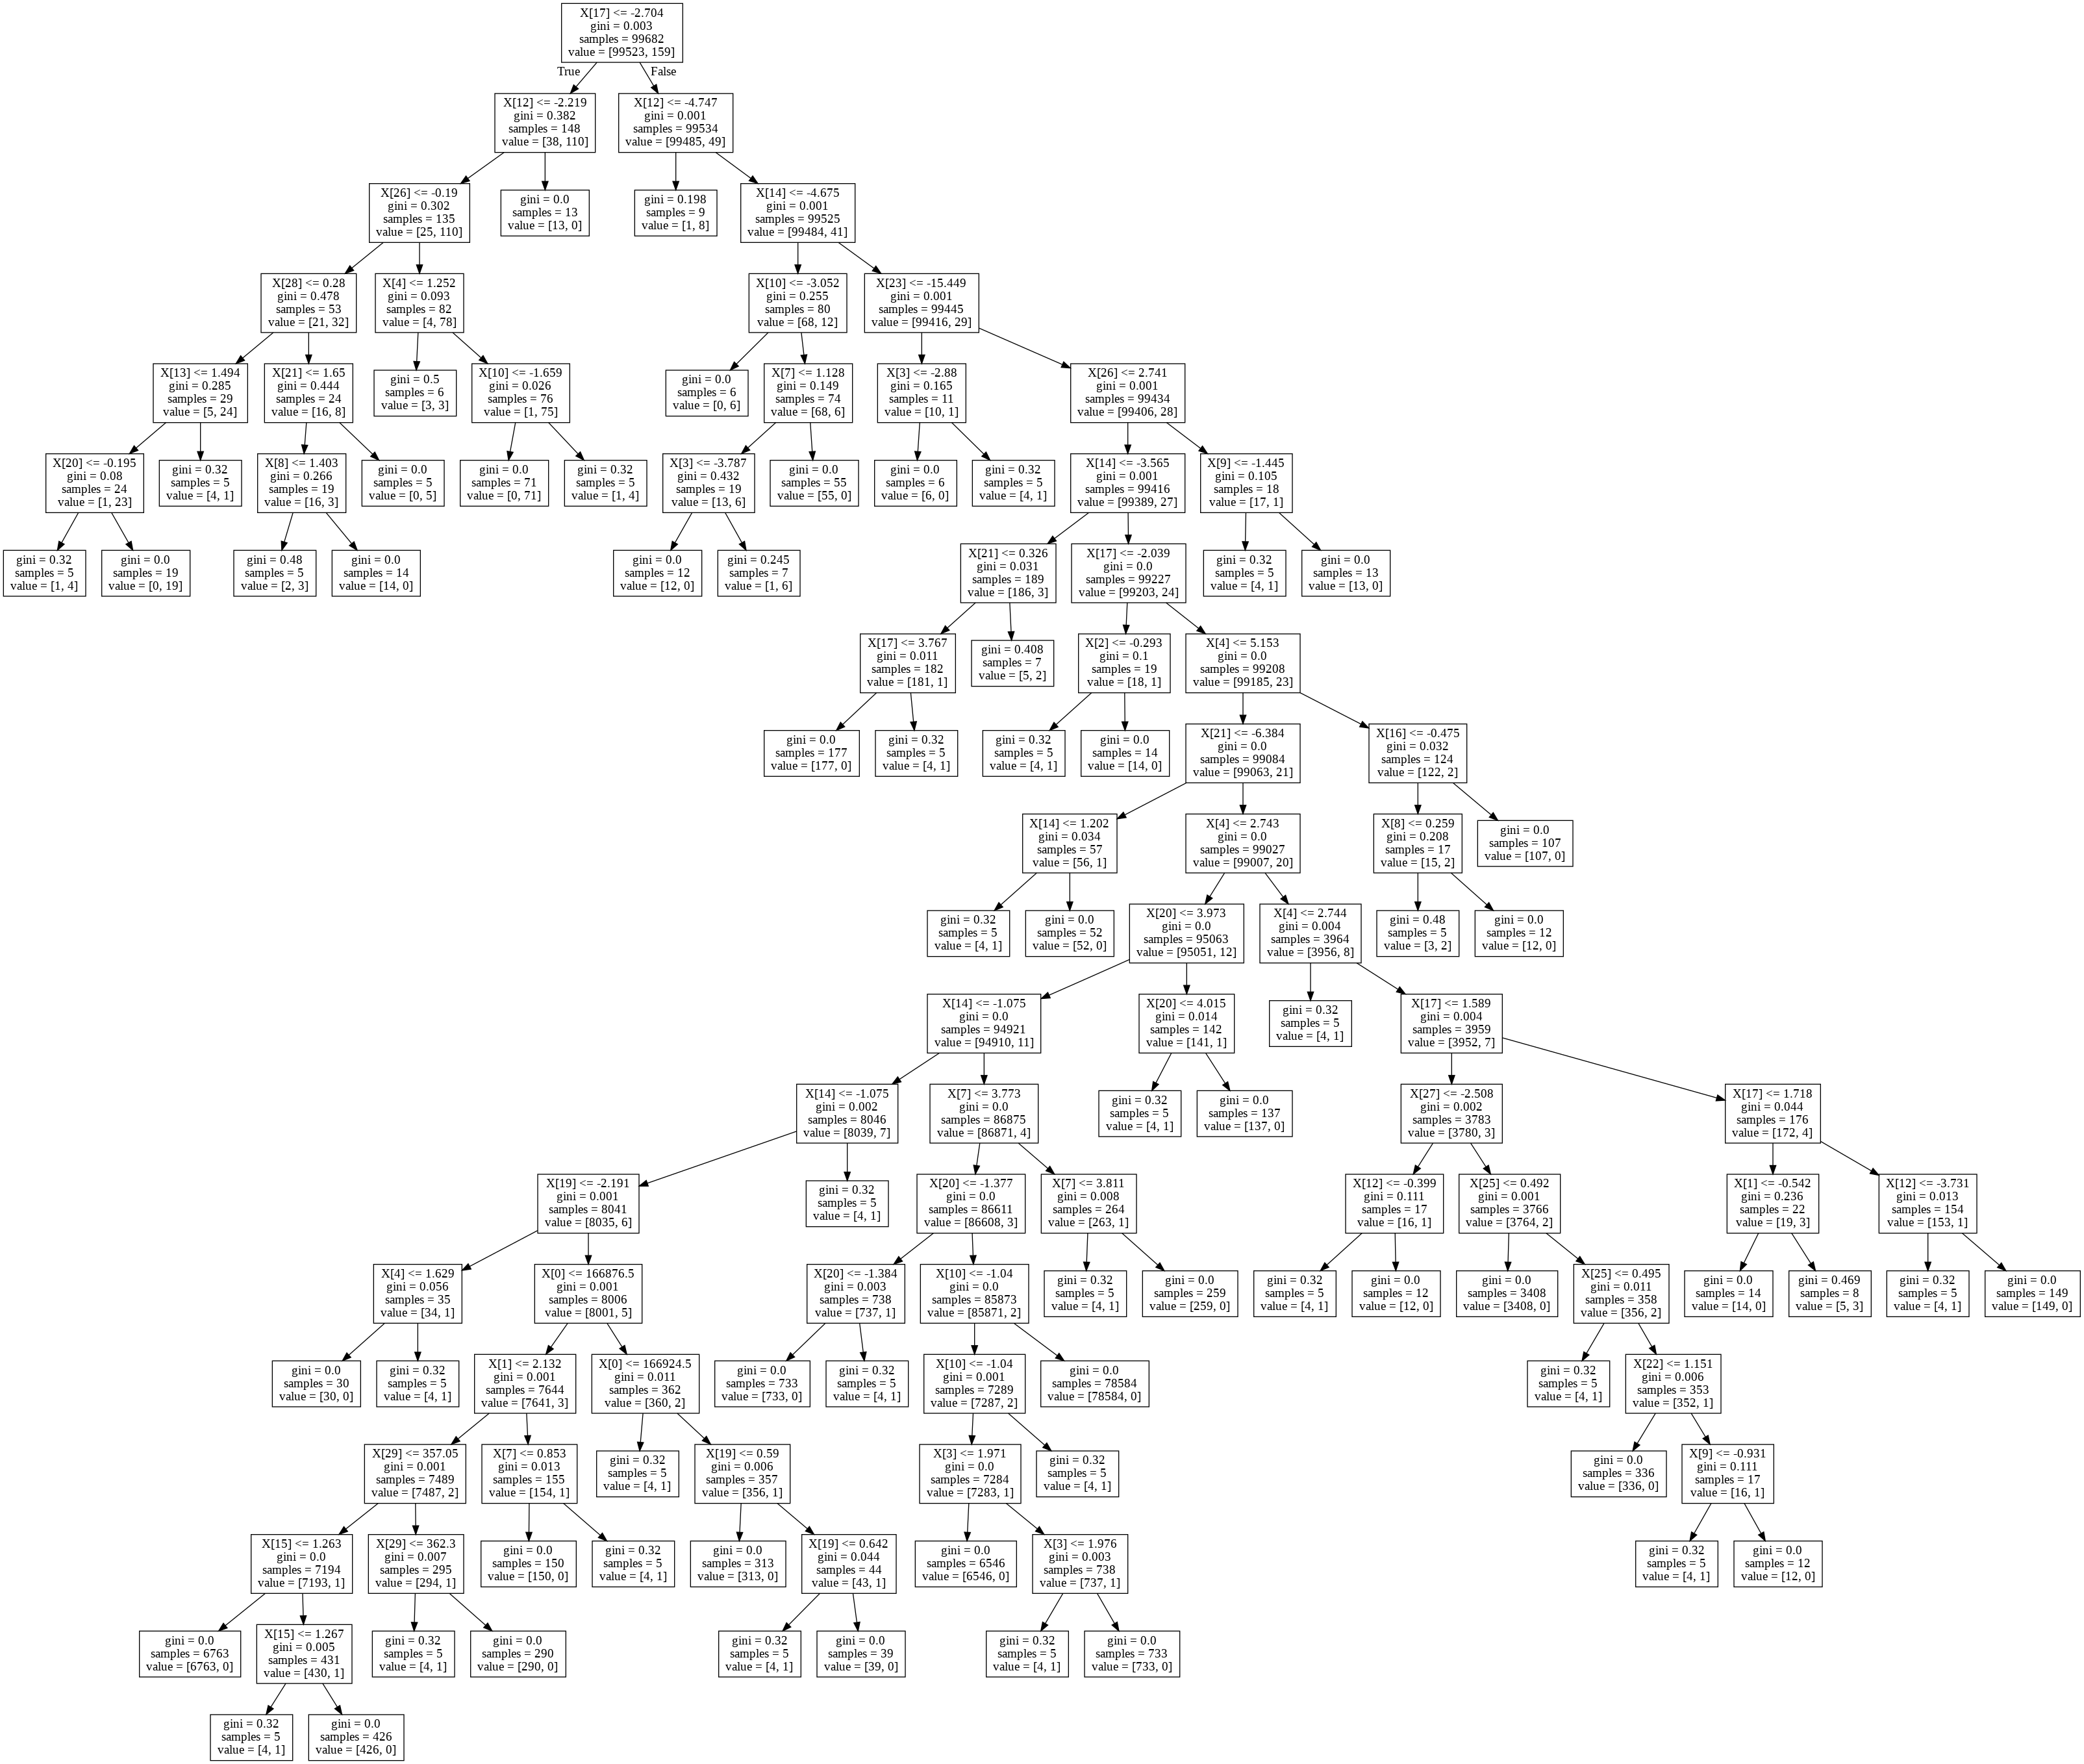

In [58]:
# tree structure
from sklearn.tree import export_graphviz
dot_data = export_graphviz(dc)
from IPython.display import Image
import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())